<a href="https://colab.research.google.com/github/RonnyGuevara/PROJECTS_2022/blob/main/TP3/CG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Código HTML

In [ ]:
<doctype html>

<html>
	<head>
	<title>FCG 2021 - TP2</title>

	<!-- Custom styles for this template -->
	<link href="style.css" rel="stylesheet">

	<!-- del proyecto -->
	<script type="text/javascript" id="includedscript" src="ejercicio.js"></script>
	<script type="text/javascript" id="includedscript" src="tp2.js"></script>

	</head>
	<body onMouseMove="MoveRocket()">

	<img id="propeller0" class="propeller" src="fire.gif"/>
	<img id="propeller1" class="propeller" src="fire.gif"/>
	<img id="propeller2" class="propeller" src="fire.gif"/>
	<img id="rocket" src="rocket.png"/>

	<div id="controls">
		<table>
			<tr><th>[W] / [↑]</th><td>Acelerar</td></tr>
			<tr><th>[S] / [↓]</th><td>Frenar</td></tr>
			<tr><th>[A] / [←]</th><td>Rotar antihorario</td></tr>
			<tr><th>[D] / [→]</th><td>Rotar horario</td></tr>
			<tr><th>[Scroll]</th><td>Zoom in/out</td></tr>
			<tr><th>[H]</th><td>Ayuda</td></tr>
		</table>
	</div>
	</body>
</html>


#Código JAVA

In [ ]:
// Cohete y fondo
var rocket = {
    positionX : 0,
    positionY : 0,
    rotation  : 0,
    scale     : 1,
    speed     : 0,
};

var background = {
    positionX : 0,
    positionY : 0,
};

// Listeners para el mouse y el teclado
document.addEventListener("keydown", KeyDown, false);
document.addEventListener("wheel", WheelZoom);

// Zoom in/out
function WheelZoom(e) 
{
    if (e.deltaY < 0) 
    {
        rocket.scale    *= 1.05; // Factor
    }
    else if (e.deltaY > 0)
    {
        rocket.scale    *= 0.95; // Factor
    }
}

// Teclado
function KeyDown(e)
{
    var keyCode = e.key;
    switch ( e.key ) {
        case "a": case "ArrowLeft" : rocket.rotation -= 5;    break;
        case "d": case "ArrowRight": rocket.rotation += 5;    break;
        case "w": case "ArrowUp"    : rocket.speed += 1; if ( rocket.speed > 100 ) rocket.speed = 100; break;
        case "s": case "ArrowDown"  : rocket.speed -= 1; if ( rocket.speed <   0 ) rocket.speed =   0; break;
        case "h":
            var d = document.getElementById('controls');
            d.style.display = d.style.display=="" ? "none" : "";
            break;
    }
    UpdateTrans();
}

// Mover el cohete
function MoveRocket()
{
    rocket.positionX = event.clientX;
    rocket.positionY = event.clientY;
    UpdateTrans();
}

// Actualizar las transformaciones y los propulsores del cohete
function UpdateTrans()
{   
    // Cohete
    var a = rocket.speed * rocket.scale;
    var m = BuildTransform( rocket.positionX, rocket.positionY, rocket.rotation, rocket.scale );
    var b = document.getElementById('rocket');
    b.style.transform = "matrix(" + m[0] + "," + m[1] + "," + m[3] + "," + m[4] + "," + m[6] + "," + m[7] + ")";

    // Propulsores
    var offset = Array(
        { x:-30, y: 60 },
        { x: 30, y: 60 },
        { x:  0, y: 75 });

    for ( var i=0; i<3; ++i ) {
        var p = document.getElementById('propeller'+i);
        var r = 180;
        var s = rocket.speed / 100;
        var t = BuildTransform( offset[i].x, offset[i].y, r, s );
        t = ComposeTransforms( t, m );
        p.style.transform = "matrix(" + t[0] + "," + t[1] + "," + t[3] + "," + t[4] + "," + t[6] + "," + t[7] + ")";
    }

    var px = rocket.positionX + background.positionX * rocket.scale;
    var py = rocket.positionY + background.positionY * rocket.scale;

    document.body.style.backgroundPosition = px + "px " + py + "px";
    document.body.style.backgroundSize     = (rocket.scale * 1600) + "px";
}

// Game loop -> https://www.w3schools.com/jsref/met_win_setinterval.asp
setInterval( function() {
    var speed = rocket.speed * 0.25;
    var angle = rocket.rotation * Math.PI/180;
    var velX  = -Math.sin(angle) * speed;
    var velY  =  Math.cos(angle) * speed;
    background.positionX += velX;
    background.positionY += velY;
    var sx = 1600;
    var sy = sx;
    if ( background.positionX < 0  ) background.positionX += sx;
    if ( background.positionY < 0  ) background.positionY += sy;
    if ( background.positionX > sx ) background.positionX -= sx;
    if ( background.positionY > sy ) background.positionY -= sy;
    UpdateTrans();
}, 15 );


In [ ]:
// Esta función construye una matriz de transfromación de 3x3 en coordenadas homogéneas 
// utilizando los parámetros de posición, rotación y escala. La estructura de datos a 
// devolver es un arreglo 1D con 9 valores en orden "column-major". Es decir, para un 
// arreglo A[] de 0 a 8, cada posición corresponderá a la siguiente matriz:
//
// | A[0] A[3] A[6] |
// | A[1] A[4] A[7] |
// | A[2] A[5] A[8] |
// 
// Se deberá aplicar primero la escala, luego la rotación y finalmente la traslación. 
// Las rotaciones vienen expresadas en grados. 
function BuildTransform( positionX, positionY, rotation, scale )
{
	var angle = rotation * Math.PI/180;
	var matrix = [
	scale*Math.cos(angle), scale*Math.sin(angle), 0,

	scale*-Math.sin(angle), scale*Math.cos(angle), 0,

	positionX, positionY, 1
		]

	return matrix;
	
}

// Esta función retorna una matriz que resula de la composición de trasn1 y trans2. Ambas 
// matrices vienen como un arreglo 1D expresado en orden "column-major", y se deberá 
// retornar también una matriz en orden "column-major". La composición debe aplicar 
// primero trans1 y luego trans2. 


function ComposeTransforms( trans1, trans2 )
{
	var C = [];
	for ( var i=0; i<4; ++i ) 
	{
		for ( var j=0; j<4; ++j ) 
		{
			var v = 0;
			for ( var k=0; k<4; ++k ) 
			{
				v += trans2[j+4*k] * trans1[k+4*i];
			}
			C.push(v);
		}
	}


	return C;
}


#Resultado

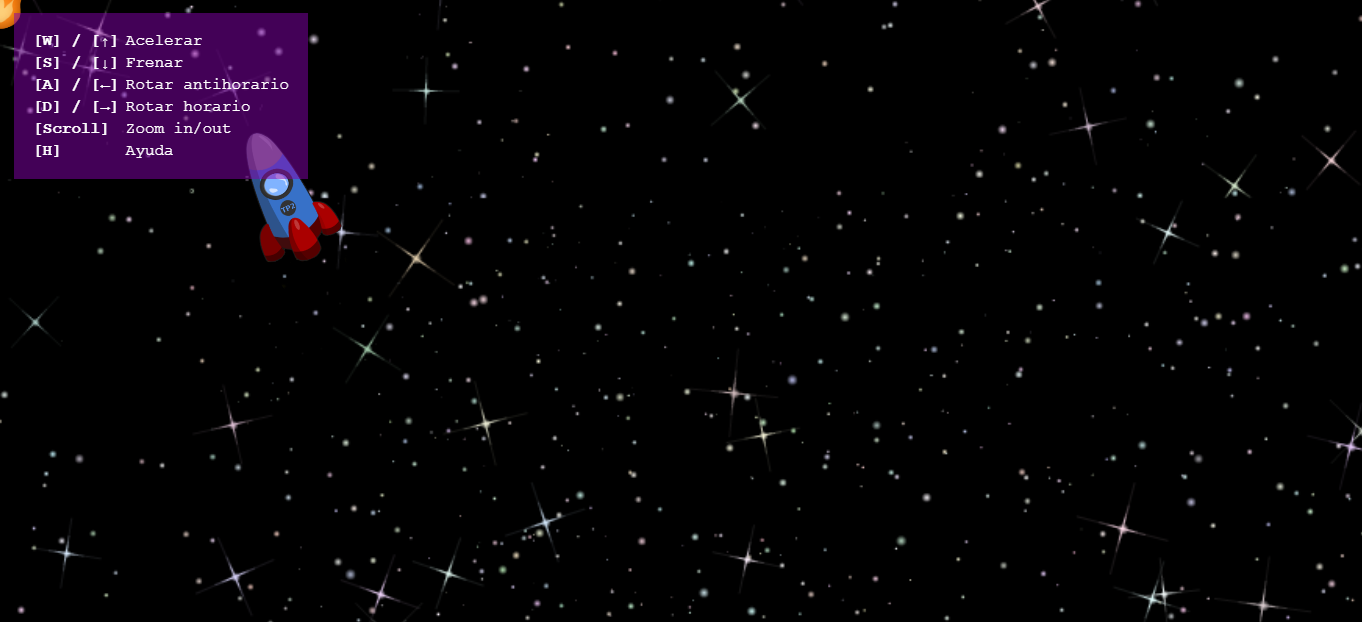

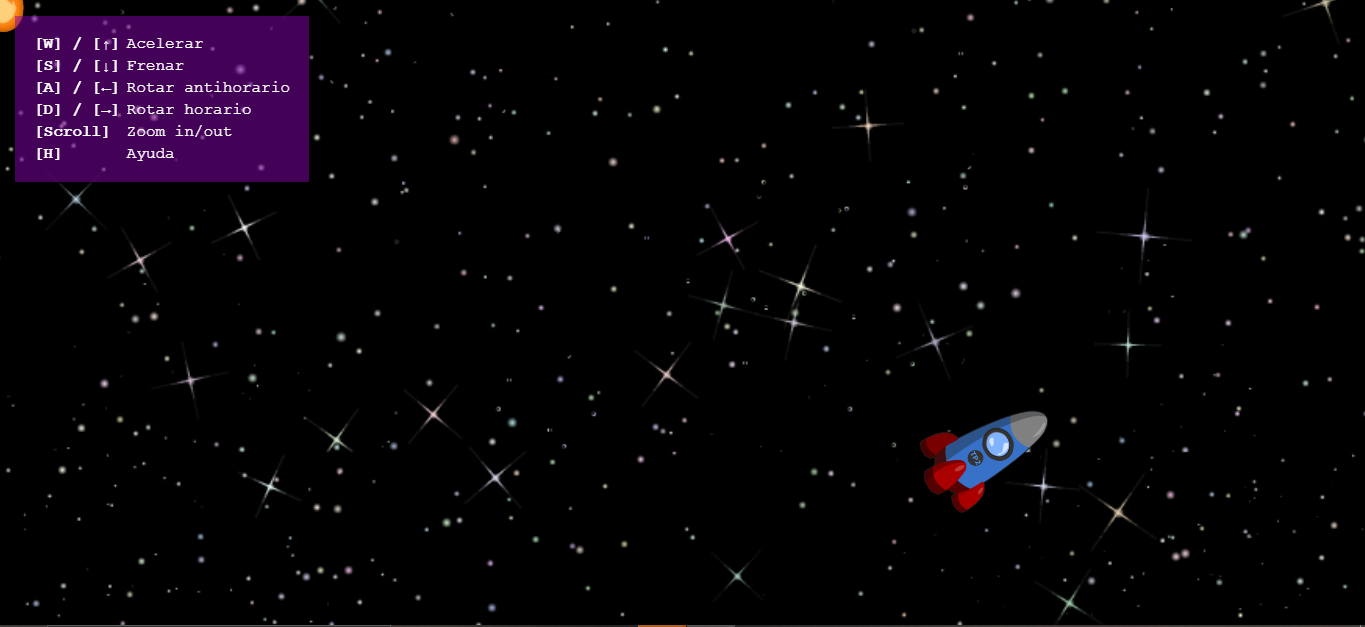

##Matriz de escalamiento, rotación y traslación

In [ ]:
	var angle = rotation * Math.PI/180;
	var matrix = [
	scale*Math.cos(angle), scale*Math.sin(angle), 0,

	scale*-Math.sin(angle), scale*Math.cos(angle), 0,

	positionX, positionY, 1
		]

	return matrix;